## Gradient Descent Implementation #5
Here we attempt to use our basic implementation of gradient descent to estimate 2 parameters for classification.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

%matplotlib inline

Here we setup data with 2 features and 2 classes based on which side of the line the data falls.  The prediction task will be to determine the parameters of the line that best seperates the data into 2 classes.

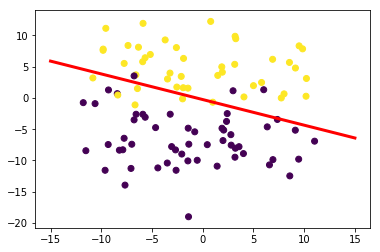

In [11]:
n = 100
xs = np.random.uniform(-10, 10, n)
ys = np.random.uniform(-12, 12, n)
x = np.stack([np.ones(n), xs, ys], axis=1)

expected_thetas = np.array([1., 1.6, 3.9])

#decision boundary and classes
xb = np.linspace(-15, 15, n)
yb = 1. / expected_thetas[2] * (-expected_thetas[1]*xb - expected_thetas[0])
y = (yb < x @ expected_thetas).astype(int)

#add noise to data
xs = xs + np.random.normal(0, 1.8, n)
ys = ys + np.random.normal(0, 2.1, n)

plt.plot(xb, yb, linewidth=3, color='red')
plt.scatter(xs, ys, c=y)
plt.show()

final cost:         0.03803230730985775
estimated params:   [0.33151354 0.56828502 2.03465244]
expected params:    [1.  1.6 3.9]


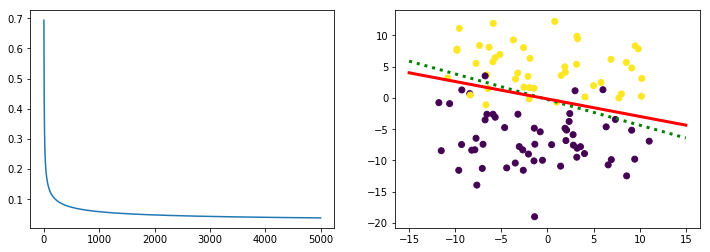

In [17]:
learning_rate = 1e-2
iterations = 5000
num_params = 3

def sigmoid(x, theta):
    z = x @ theta
    return 1. / (1. + np.exp(-z))

def cost(yp, y):
    N = len(y)
    return -1./N * (y @ np.log(yp) + (1.-y) @ np.log(1.-yp))

#x_scaled = preprocessing.scale(x)
x_scaled = x
thetas = np.zeros(num_params)
costs = []

for _ in range(iterations):
    yp = sigmoid(x_scaled, thetas)
    costs.append(cost(yp, y))
    gradient = (yp - y) @ x_scaled / n
    thetas -= learning_rate*gradient

#estimated boundary
ybe = 1. / thetas[2] * (-thetas[1]*xb - thetas[0])

print("final cost:        ", costs[-1])
print("estimated params:  ", thetas)
print("expected params:   ", expected_thetas)

f = plt.figure(figsize=(12,4))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax.plot(costs)

ax2.plot(xb, yb, linewidth=3, color='green', linestyle=':')
ax2.plot(xb, ybe, linewidth=3, color='red')
ax2.scatter(xs, ys, c=y)

plt.show()